In [ ]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# YOLO V3 (Keras) Fastbreak
> You can train your own YOLO V3 model with the instruction below.
<br> citation : https://github.com/qqwweee/keras-yolo3 <br/>
***

## Quick Start :
 
- [x] Step 1 : Download YOLOv3 weights from YOLO website.
```
wget https://pjreddie.com/media/files/yolov3.weights
```
- [x] Step 2 : Convert the Darknet YOLO model to a Keras model.
```
python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5
```
- [ ] Step 3 : Run YOLO detection.

> Step 1 and Step 2 are done.
<br>path : “model_data/yolo_weights.h5”<br/>

***

## Step 1 :
### Put your dataset in specific document. Please notice that the data name should be the same.
> - Original Image  ----- > "./dataset/img"<br/>
> - Labal .xml      ----- > "./dataset/xml"<br/>

### Run "convert_dataframe.py" to convert your dataset into yolo dataframe. 
It will pop up a text file "own_datapath.txt" which yolov3 need.
> - The content of “own_datapath.txt” may follow the rule bellow.<br/>
> - (Filepath (blank) boundingbox(x, y, w, h), Category(index))<br/>
> - e.g. ”dataset/img/car1.jpg 52,12,544,313,6“


In [6]:
%run convert_dataframe.py

document： lauggage_000.jpg
document： lauggage_001.jpg
document： lauggage_002.jpg
document： lauggage_003.jpg
document： lauggage_004.jpg
document： lauggage_005.jpg
document： lauggage_006.jpg
document： lauggage_007.jpg
document： lauggage_008.jpg
document： lauggage_009.jpg
document： lauggage_010.jpg
document： lauggage_011.jpg
document： lauggage_012.jpg
document： lauggage_013.jpg
document： lauggage_014.jpg
document： lauggage_015.jpg
document： lauggage_016.jpg
document： lauggage_017.jpg
document： lauggage_018.jpg
document： lauggage_019.jpg
document： lauggage_020.jpg
document： lauggage_021.jpg
document： lauggage_022.jpg
document： lauggage_023.jpg
document： lauggage_024.jpg
document： lauggage_025.jpg
document： lauggage_026.jpg
document： lauggage_027.jpg
document： lauggage_028.jpg
document： lauggage_029.jpg
document： lauggage_030.jpg
document： lauggage_031.jpg
document： lauggage_032.jpg
document： lauggage_033.jpg
document： lauggage_034.jpg
document： lauggage_035.jpg
document： lauggage_036.jpg
d

### Run "kmeans.py" to cluster your anchors' scale with bounding box.
> the anchor size and accuracy would be print below <br/>

In [7]:
%run kmeans.py

K anchors:
 [[ 77  59]
 [ 89  77]
 [ 95  61]
 [108  79]
 [120  95]
 [134 131]
 [146 107]
 [185 147]
 [222 193]]
Accuracy: 86.53%


***

## Step 2 :
### Replace the class name inside "./model_data/class.txt" and note the class order.
> The parameters inside "train.py" can be adjusted , please check before start training process.
> - e.g. file path, input_shape, data split, learning rate, etc.

### Run the cell below to train your own model. 
> After training, it will generate “logs/000/trained_weights_final.h5”. This file has to be moved into "./model_data/"

In [8]:
%run train.py

C:\Users\asi\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\asi\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\asi\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\asi\AppData\Roaming\Python\Python37\site-packages








Create YOLOv3 model with 9 anchors and 1 classes.
Load weights model_data/yolo_weights.h5.
Freeze the first 249 layers of total 252 layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 96 samples, val on 41 samples, with batch size 1.


Epoch 1/150
96/96 [==============================] - 31s 328ms/step - loss: 37.4147 - val_loss: 38.3484
Epoch 2/150
96/96 [==============================] - 19s 195ms/step - loss: 35.0858 - val_loss: 35.8114
Epoch 3/150
96/96 [==============================] - 19s 194ms/step - loss: 34.4319 - val_loss: 36.9777
Epoch 4/150
94/96 [============================>.] - ETA: 0s - loss: 32.6384

KeyboardInterrupt: 

In [10]:
# copy and move the file
import shutil
shutil.copyfile('logs/training_weight_001/trained_weights_final.h5', 'trained_weights/yolo_weights_test1.h5')

'trained_weights/yolo_weights_test1.h5'

***
## Step 3 :
### Run the cell below to check the image

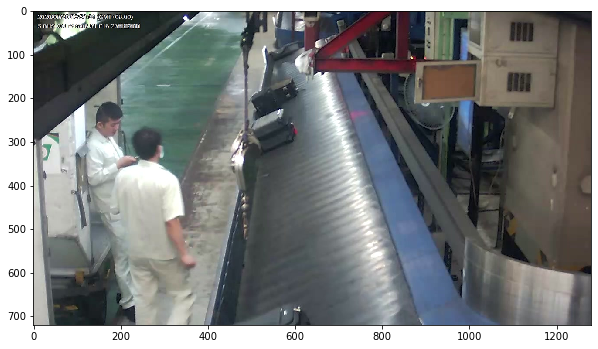

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("./dataset/img/lauggage_057.jpg",cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

### Modify the parameters inside "yolo_infer_param.py",  especially "score" and "model_image_size". 
> "model_image_size" should be as same as the size inside training process.("training.py")
<br> If the object had not been detected, decrease the "score".  <br/>

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term




Image detection mode
 Ignoring remaining command line arguments: ,



trained_weights/yolo_weights_test1.h5 model, anchors, and classes loaded.
GPU_num :  1
IOU :  0.45
Score :  0.2
Test :  1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Input image filename:./dataset/img/lauggage_057.jpg
(640, 640, 3)
Found 2 boxes for img
lauggage 0.43 (421, 150) (655, 406)
lauggage 0.44 (442, 53) (677, 299)
time :  2.3820812000001297
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x16B9D35DF98>


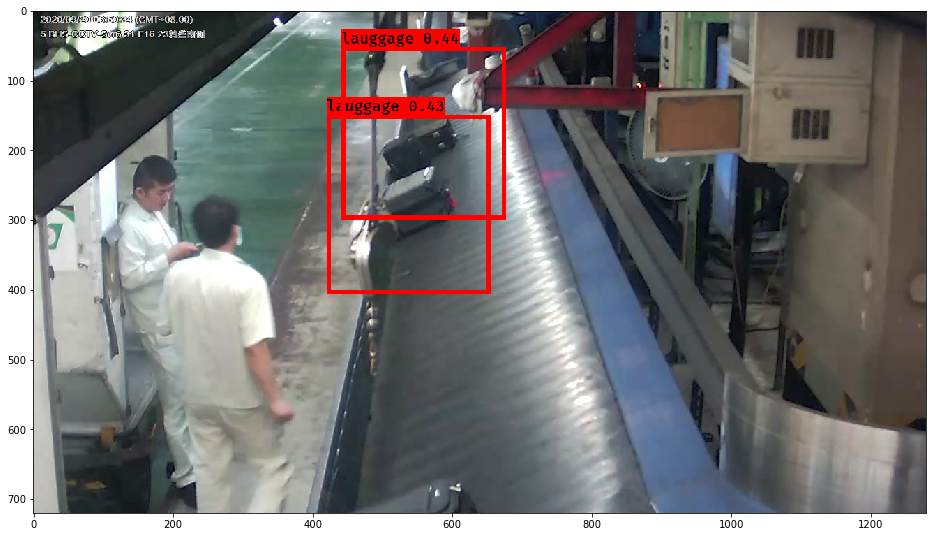

In [ ]:
%run yolo_demo.py --image

In [ ]:
%run yolo_video.py --input=./video/XXX.mp4 --output=./video/XXX.mp4